In [1]:
from run_pde_model import pde_3D_model_implicit
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
from IPython.display import HTML

pde_3D_model_implicit
draw_solution
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.  5. 10.]
[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
draw_solution
[[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 [[9.94378676e-01 8.90997175e-04 8.90997175e-04]
  [8.90997175e-04 1.59801088e-06 1.59801088e-06]
  [8.90997175e-04 1.59801088e-06 1.59801088e-06]]

 [[9.88794593e-01 1.77306748e-03 1.77306748e-03]
  [1.77306748e-03 4.77254561e-06 4.77254561e-06]
  [1.77306748e-03 4.77254561e-06 4.77254561e-06]]

 [[9.83247467e-01 2.64628666e-03 2.64628666e-03]
  [2.64628666e-03 9.50218831e-06 9.50218831e-06]
  [2.64628666e-03 9.50218831e-06 9.50218831e-06]]

 [[9.77737019e-01 3.51072985e-03 3.51072985e-03]
  [3.51072985e-03 1.57657357e-05 1.57657357e-05]
  [3.51072985e-03 1.57657357e-05 1.57657357e-05]]

 [[9.72262970e-01 4.36647155e-03 4.36647155e-0

In [ ]:
parameters = {
       'time_start': 0,
    'time_end': 100,
    'time_step': 1,
    'space_start': 0,
    'space_end': 10,
    'space_points': 10,
    'S0': 1,
    'R0': 100,
    'N0': 1,
    'S0_distribution': 'uniform',
    'R0_distribution': 'uniform',
    'N0_distribution': 'uniform',
    'S0_extra_parameters': [0.1,0.1],
    'R0_extra_parameters': [0.1, 0.1],
    'N0_extra_parameters': [0.1, 0.1],
    'growth_rate_S': 0.04,
    'growth_rate_R': 0.04,
    'growth_rate_N': 0.04,
    'carrying_capacity': 4.9,
    'diffusion_coefficient_S': 0.1,
    'diffusion_coefficient_R': 0.1,
    'diffusion_coefficient_N': 0.1,
    'standard_deviation_S': 0.01,
    'standard_deviation_R': 0.01,
    'standard_deviation_N': 0.01,
    'maximum_tolerated_dose': 1,
    'death_rate_S': 0.0,
    'death_rate_R': 0.0,
    'death_rate_N': 0.0,
    'division_rate_S': 0.,
    'division_rate_N': 0.,
    'therapy_type': 'adaptive',
    'current_state': 1,
    'time_boundary_conditions': 'Periodic',
    'S0_left': 0,
    'R0_left': 0,
    'S0_right': 0,
    'R0_right': 0,
    'diffusion_type': 'standard',

    #masking option - check this 
    'cut': 'off', #can be on or off depending on cutout 
    'cut_tolerence': 1e-2
}

S, R, N, D, X, T = pde_3D_model_implicit(parameters)

In [ ]:
# make intial plot
def animate3d(data,parameters,figax):
    fig,ax = figax
    # fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    x = np.linspace(parameters['space_start'],parameters['space_end'],parameters['space_points'])
    y = np.linspace(parameters['space_start'],parameters['space_end'],parameters['space_points'])
    X, Y = np.meshgrid(x, y)
    Z = data[0,:,:]
    zmin = 0 
    zmax = 1
    surf = ax.plot_surface(X,Y,Z,cmap=plt.cm.viridis,linewidth=0, antialiased=False)
    ax.set(xlim=(parameters['space_start'],parameters['space_end']),ylim=(parameters['space_start'],parameters['space_end']),zlim = (zmin,zmax))
    def update(i):
        ax.clear()
        fig.suptitle(f"t = {i:.1f}")
        ax.set(xlim=(parameters['space_start'],parameters['space_end']),ylim=(parameters['space_start'],parameters['space_end']),zlim = (zmin,zmax))
        Z = data[i,:,:]
        surf = ax.plot_surface(X,Y,Z,cmap=plt.cm.viridis,linewidth=0, antialiased=False)
    T = int((parameters['time_end']-parameters["time_start"])/parameters['time_step'])
    anim = animation.FuncAnimation(fig,update,frames=T)
    return anim

fig,ax = plt.subplots(1,3,subplot_kw={"projection": "3d"})
ax[0].set_title('S')
anim = animate3d(S,parameters,(fig,ax[0]))
HTML(anim.to_jshtml()) 
ax[1].set_title('R')
anim = animate3d(R,parameters,(fig,ax[1]))
HTML(anim.to_jshtml()) 
ax[2].set_title('N')
anim = animate3d(N,parameters,(fig,ax[2]))
HTML(anim.to_jshtml()) 


## Plotting S,R and N animations 

In [ ]:
#plotting things individually 
def animate3d(data,parameters,figax):
    fig,ax = figax
    #cax = divider.append_axes("right", size="5%", pad=0.05)
    #fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    x = np.linspace(parameters['space_start'],parameters['space_end'],parameters['space_points'])
    y = np.linspace(parameters['space_start'],parameters['space_end'],parameters['space_points'])
    X, Y = np.meshgrid(x, y)
    Z = data[0,:,:]
    zmin = 0 
    zmax = 1
    surf = ax.plot_surface(X,Y,Z,cmap=plt.cm.viridis,linewidth=0, antialiased=False)

    ax.set(xlim=(parameters['space_start'],parameters['space_end']),ylim=(parameters['space_start'],parameters['space_end']),zlim = (zmin,zmax))
    def update(i):
        ax.clear()
        fig.suptitle(f"t = {i:.1f}")
        ax.set(xlim=(parameters['space_start'],parameters['space_end']),ylim=(parameters['space_start'],parameters['space_end']),zlim = (zmin,zmax))
        Z = data[i,:,:]
        surf = ax.plot_surface(X,Y,Z,cmap=plt.cm.viridis,linewidth=0, antialiased=False)
    
    T = int((parameters['time_end']-parameters["time_start"])/parameters['time_step'])
    anim = animation.FuncAnimation(fig,update,frames=T)
    return anim

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.set_title('S')
anim = animate3d(S,parameters,(fig,ax))
HTML(anim.to_jshtml()) 


In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.set_title('R')
anim = animate3d(R,parameters,(fig,ax))
HTML(anim.to_jshtml()) 

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.set_title('N')
anim = animate3d(N,parameters,(fig,ax))
HTML(anim.to_jshtml()) 

In [ ]:
#test surface animation 

N = 150 # Meshsize
fps = 10 # frame per sec
frn = 50 # frame number of the animation

x = np.linspace(-4,4,N+1)
x, y = np.meshgrid(x, x)
zarray = np.zeros((N+1, N+1, frn))

f = lambda x,y,sig : 1/np.sqrt(sig)*np.exp(-(x**2+y**2)/sig**2)

for i in range(frn):
    zarray[:,:,i] = f(x,y,1.5+np.sin(i*2*np.pi/frn))

In [ ]:
parameters2 = {
    'time_start': 0,
    'time_end': 100,
    'time_step': 1,
    'space_start': 0,
    'space_end': 10,
    'space_points': 10,
    'S0': 1,
    'R0': 0.5,
    'N0': 1,
    'S0_distribution': 'patch',
    'R0_distribution': 'uniform',
    'N0_distribution': 'uniform',
    'S0_extra_parameters': ['circle', 5, 5,2],
    'R0_extra_parameters': [0.1, 0.1],
    'N0_extra_parameters': [0.1, 0.1],
    'growth_rate_S': 0.04,
    'growth_rate_R': 0.04,
    'growth_rate_N': 0.04,
    'carrying_capacity': 4.9,
    'diffusion_coefficient_S': 1,
    'diffusion_coefficient_R': 0.1,
    'diffusion_coefficient_N': 0.1,
    'standard_deviation_S': 0.01,
    'standard_deviation_R': 0.01,
    'standard_deviation_N': 0.01,
    'maximum_tolerated_dose': 1,
    'death_rate_S': 0.03,
    'death_rate_R': 0.03,
    'death_rate_N': 0.03,
    'division_rate_S': 0.3,
    'division_rate_N': 0.3,
    'therapy_type': 'adaptive',
    'current_state': 1,
    'time_boundary_conditions': 'Periodic',
    'S0_left': 0,
    'R0_left': 0,
    'S0_right': 0,
    'R0_right': 0,
    'diffusion_type': 'standard',

    #masking option - check this 
    'cut': 'on', #can be on or off depending on cutout 
    'cut_tolerence': 1e-2
}

S_cut, R_cut, N_cut, D_cut, X_cut, T_cut = pde_3D_model_implicit(parameters2)

## Plotting animations for S, R and N cells with cut off 

In [ ]:
def animate3d(data,parameters,figax):
    fig,ax = figax
    #cax = divider.append_axes("right", size="5%", pad=0.05)
    #fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    x = np.linspace(parameters['space_start'],parameters['space_end'],parameters['space_points'])
    y = np.linspace(parameters['space_start'],parameters['space_end'],parameters['space_points'])
    X, Y = np.meshgrid(x, y)
    Z = data[0,:,:]
    zmin = 0 
    zmax = 1
    surf = ax.plot_surface(X,Y,Z,cmap=plt.cm.viridis,linewidth=0, antialiased=False)

    ax.set(xlim=(parameters['space_start'],parameters['space_end']),ylim=(parameters['space_start'],parameters['space_end']),zlim = (zmin,zmax))
    def update(i):
        ax.clear()
        fig.suptitle(f"t = {i:.1f}")
        ax.set(xlim=(parameters['space_start'],parameters['space_end']),ylim=(parameters['space_start'],parameters['space_end']),zlim = (zmin,zmax))
        Z = data[i,:,:]
        surf = ax.plot_surface(X,Y,Z,cmap=plt.cm.viridis,linewidth=0, antialiased=False)
    
    T = int((parameters['time_end']-parameters["time_start"])/parameters['time_step'])
    anim = animation.FuncAnimation(fig,update,frames=T)
    return anim

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.set_title('S')
anim = animate3d(S,parametersODE,(fig,ax))
HTML(anim.to_jshtml()) 

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.set_title('R')
anim = animate3d(R_cut,parameters,(fig,ax))
HTML(anim.to_jshtml()) 


In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.set_title('N')
anim = animate3d(N_cut,parameters,(fig,ax))
HTML(anim.to_jshtml()) 

## Comparing cut off and no cut off 

In [ ]:
diff_S = S - S_cut
#diff_R = R - R_cut
#diff_N = N - N_cut

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.set_title('diff S')
anim = animate3d(diff_S,parameters,(fig,ax))
HTML(anim.to_jshtml()) 

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.set_title('R')
anim = animate3d(diff_R,parameters,(fig,ax))
HTML(anim.to_jshtml()) 

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.set_title('N')
anim = animate3d(diff_N,parameters,(fig,ax))
HTML(anim.to_jshtml()) 

## Contour plot function 

In [ ]:
def animate2d(data,parameters):#figax):
    
    # Set the figure size
    plt.rcParams["figure.figsize"] = [6.00, 6.00]
    plt.rcParams["figure.autolayout"] = True

    # Create a figure and a set of subplots
    fig, ax = plt.subplots()

    # Method to change the contour data points
    def update(i):
        ax.clear()
        ax.contourf(data[i,:,:], cmap='plasma',vmin=np.min(data[10:]),vmax=np.max(data[10:]))

    # Call animate method
    T = int((parameters['time_end']-parameters["time_start"])/parameters['time_step'])
    anim = animation.FuncAnimation(fig,update,frames=T)
    return anim


#ax = fig.add_subplot(111)
ax.set_title('S')
anim = animate2d(S,parameters)
HTML(anim.to_jshtml()) 

In [ ]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

# Random data for the contour plot
#data = np.random.randn(800).reshape(10, 10, 8)

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Method to change the contour data points
def animate(i):
    ax.clear()
    ax.contourf(S[i,:, :], cmap='plasma')

# Call animate method
ani = animation.FuncAnimation(fig, animate, 5, interval=50, blit=False)

# Display the plot
plt.show()

## Plotting densities 

In [7]:
#reproducing the data from ODE model 

parametersODE = {
    'time_start': 0,
    'time_end': 100,
    'time_step': 1,
    'space_start': 0,
    'space_end': 1,
    'space_points':1,
    'S0': 0.9,
    'R0': 0.01,
    'N0': 0,
    'S0_distribution': 'uniform',
    'R0_distribution': 'uniform',
    'N0_distribution': 'uniform',
    'S0_extra_parameters': [0.1, 0.1],
    'R0_extra_parameters': [0.1, 0.1],
    'N0_extra_parameters': [0.1, 0.1],
    'growth_rate_S': 0.027,
    'growth_rate_R': 0.3,
    'growth_rate_N': 0.0,
    'carrying_capacity': 0.4,
    'diffusion_coefficient_S': 0,
    'diffusion_coefficient_R': 0,
    'diffusion_coefficient_N': 0.,
    'standard_deviation_S': 0.0,
    'standard_deviation_R': 0.0,
    'standard_deviation_N': 0.00,
    'maximum_tolerated_dose': 1,
    'death_rate_S': 0.013,
    'death_rate_R': 0.013,
    'death_rate_N': 0.0,
    'division_rate_S': 0.75,
    'division_rate_N': 0.,
    'therapy_type': 'adaptive',
    'adaptive_therapy_ratio': 0.5,
    'current_state': 0,
    'time_boundary_conditions': 'Periodic',
    'S0_left': 0,
    'R0_left': 0,
    'S0_right': 0,
    'R0_right': 0,
    'diffusion_type': 'standard',

    #masking option - check this 
    'cut': 'off', #can be on or off depending on cutout 
    'cut_tolerence': 1e-2
}

S, R, N, D, X, T = pde_3D_model_implicit(parametersODE)

pde_3D_model_implicit


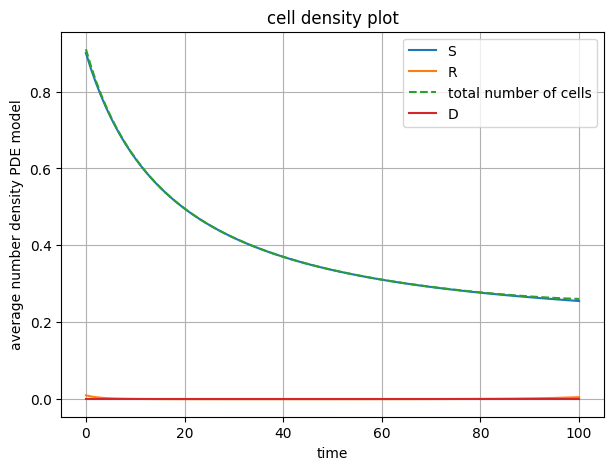

In [8]:
def density(data, time, parameters):
    #time frames
    #T = int((parameters['time_end']-parameters["time_start"])/parameters['time_step'])
    #area
    x = parameters['space_end']- parameters['space_start']
    A = x*x
    
    meandensity = []

    for i in range(len(time)):
        rho = np.mean(data[i,:,:])
        meandensity.append(rho)
    return meandensity
        
rhoS = density(S,T,parametersODE)    
rhoR = density(R,T,parametersODE)
rhotot = density(R+S,T,parametersODE)      
#rhoN = density(N,parameters) 

def densityplot(S,R,total,D,T):

    plt.figure(figsize=(7, 5))

    plt.plot(T, S, label='S')
    plt.plot(T, R, label='R')
    plt.plot(T, total, label='total number of cells', linestyle = '--')
    plt.plot(T, D, label = 'D')
    # naming the x axis
    plt.xlabel('time')
    # naming the y axis
    plt.ylabel('average number density PDE model')
    plt.title('cell density plot')
    plt.legend()
    # show a legend on the plot
    #plt.legend()
    plt.grid()
    # function to show the plot
    plt.show()

densityplot(rhoS,rhoR,rhotot,D,T)

### trying to find diffusion values which leed to effective adaptive therapy

In [ ]:
for i in range(10):
    #reproducing the data from ODE model 

    parametersODE = {
        'time_start': 0,
        'time_end': 600,
        'time_step': 1,
        'space_start': 0,
        'space_end': 10,
        'space_points': 10,
        'S0': 0.9,
        'R0': 0.01,
        'N0': 0,
        'S0_distribution': 'uniform',
        'R0_distribution': 'uniform',
        'N0_distribution': 'uniform',
        'S0_extra_parameters': [0.1, 0.1],
        'R0_extra_parameters': [0.1, 0.1],
        'N0_extra_parameters': [0.1, 0.1],
        'growth_rate_S': np.random.rand(),
        'growth_rate_R': np.random.rand(),
        'growth_rate_N': 0.0,
        'carrying_capacity': 40,
        'diffusion_coefficient_S': 0.9,
        'diffusion_coefficient_R': 0.1,
        'diffusion_coefficient_N': 0.,
        'standard_deviation_S': 0.0,
        'standard_deviation_R': 0.0,
        'standard_deviation_N': 0.00,
        'maximum_tolerated_dose': 1,
        'death_rate_S': np.random.rand(),
        'death_rate_R': np.random.rand(),
        'death_rate_N': 0.0,
        'division_rate_S': 0.75,
        'division_rate_N': 0.,
        'therapy_type': 'adaptive',
        'adaptive_therapy_ratio': 0.5,
        'current_state': 0,
        'time_boundary_conditions': 'Periodic',
        'S0_left': 0,
        'R0_left': 0,
        'S0_right': 0,
        'R0_right': 0,
        'diffusion_type': 'standard',

        #masking option - check this 
        'cut': 'off', #can be on or off depending on cutout 
        'cut_tolerence': 1e-2
    }
    print(parametersODE['growth_rate_S'])
    print(parametersODE['growth_rate_R'])
    print(parametersODE['death_rate_S'])
    print(parametersODE['death_rate_R'])
    S, R, N, D, X, T = pde_3D_model_implicit(parametersODE)

    rhoS = density(S,T,parametersODE)    
    rhoR = density(R,T,parametersODE)  

    data = np.vstack((rhoS,rhoR))     
    densityplot(data,2,parametersODE)

    

## Test cells

In [ ]:
def update_plot(frame_number, zarray, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(x, y, zarray[:,:,frame_number], cmap="magma")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot = [ax.plot_surface(x, y, zarray[:,:,0], color='0.75', rstride=1, cstride=1)]
ax.set_zlim(0,1.1)
ani = animation.FuncAnimation(fig, update_plot, frn, fargs=(zarray, plot), interval=1000/fps)

HTML(ani.to_jshtml()) 


In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
print(X)
Y = np.arange(-5, 5, 0.25)
print(Y)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
print('###')
print(Z, np.shape(Z))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap="magma",
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
#cut off test on 3D plot 
#test array 
tol = 0
Zm = Z.copy()
mask = Zm <= tol
Zm[mask] = 0


In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})


# Plot the surface.
surf = ax.plot_surface(X, Y, Zm, cmap="magma",
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()